In [1]:
import os
import sv as SV
import numpy as np
import astropy.table as atable

from desitarget.targetmask import bgs_mask as main_bgs_mask
from desitarget.sv1.sv1_targetmask import bgs_mask as sv1_bgs_mask
from desitarget.sv3.sv3_targetmask import bgs_mask as sv3_bgs_mask

In [2]:
# -- plotting -- 
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

In [3]:
# load compiled zsuccess rates to file
dat_dir = '/global/cscratch1/sd/chahah/bgs-cmxsv/sv-paper/'
#dat_dir = '/global/cscratch1/sd/mjwilson/desi/BGS/bgs-cmxsv/'
#dat_dir = '/Users/chahah/data/bgs_cmxsv/sv_paper/'

sv1_gals = atable.Table.read(os.path.join(dat_dir, 'sv1.bgs_exps.efftime160_200.zsuccess.v4.fits'))
sv3_gals = atable.Table.read(os.path.join(dat_dir, 'sv3.bgs_exps.efftime160_200.zsuccess.v4.fits'))
main_gals = atable.Table.read(os.path.join(dat_dir, 'main.bgs_exps.efftime160_200.zsuccess.v4.fits'))

In [4]:
sv1_deep  = (sv1_gals['DEEP_EXPTIME'] > 2000) 
sv3_deep  = np.isin(sv3_gals['PRIORITY'].data, np.array([102100, 102000])) & (sv3_gals['EFFTIME_TSNR2_BGS'] > 100)

np.mean(sv1_deep), np.mean(sv3_deep)

(0.9415918811048426, 0.600423039534168)

In [5]:
sv1_brgt = (sv1_gals['SV1_BGS_TARGET'] & sv1_bgs_mask['BGS_BRIGHT']) != 0 
sv1_lowq = (sv1_gals['SV1_BGS_TARGET'] & sv1_bgs_mask['BGS_LOWQ']) != 0 
sv1_fain = (sv1_gals['SV1_BGS_TARGET'] & sv1_bgs_mask['BGS_FAINT']) != 0

sv3_brgt = (sv3_gals['SV3_BGS_TARGET'] & sv3_bgs_mask['BGS_BRIGHT']) != 0 
sv3_fain = (sv3_gals['SV3_BGS_TARGET'] & sv3_bgs_mask['BGS_FAINT']) != 0 

main_brgt = (main_gals['BGS_TARGET'] & main_bgs_mask['BGS_BRIGHT']) != 0 
main_fain = (main_gals['BGS_TARGET'] & main_bgs_mask['BGS_FAINT']) != 0

sv1
[0.96978286 0.96377749 0.97199533]
sv3
[0.93343734 0.98637602 0.98405558 0.98347263 0.97736874 0.97152362
 0.96848485 0.95583333 0.97245509]
main
[0.91878998 0.96057145 0.98080997 0.99155235 0.98133124 0.98214398
 0.98337905 0.94549058 0.93023256]


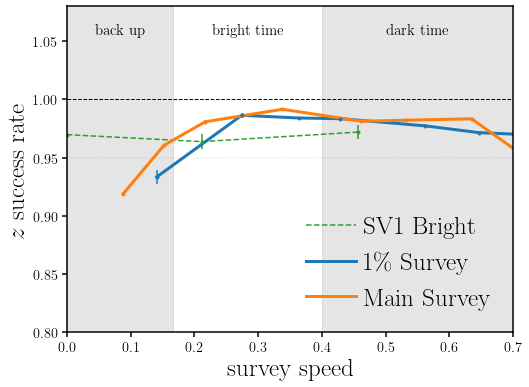

In [6]:
fig = plt.figure(figsize=(8,6))
sub = fig.add_subplot(111)

rmid, zsrate, err_zsrate = SV.zsuccess_rate(sv1_gals['ETC_SURVEY_SPEED'][sv1_deep & sv1_brgt], sv1_gals['ZSUCCESS'][sv1_deep & sv1_brgt], range=(0., 1.), nbins=10, bin_min=10)
sub.errorbar(rmid, zsrate, yerr=err_zsrate, fmt='.C2')
print('sv1')
print(zsrate)
sub.plot(rmid, zsrate, c='C2', ls='--', label='SV1 Bright')

rmid, zsrate, err_zsrate = SV.zsuccess_rate(sv3_gals['ETC_SURVEY_SPEED'][sv3_deep], sv3_gals['ZSUCCESS'][sv3_deep],  range=(0., 1.), nbins=10, bin_min=10)
sub.errorbar(rmid, zsrate, yerr=err_zsrate, fmt='.C0')
print('sv3')
print(zsrate)
sub.plot(rmid, zsrate, c='C0', lw=3, label='$1\%$ Survey')

rmid, zsrate, err_zsrate = SV.zsuccess_rate(main_gals['ETC_SURVEY_SPEED'], main_gals['ZSUCCESS'],  range=(0., 1.), nbins=10, bin_min=10)
sub.errorbar(rmid, zsrate, yerr=err_zsrate, fmt='.C1')
print('main')
print(zsrate)
sub.plot(rmid, zsrate, c='C1', lw=3, label='Main Survey')


sub.axhline(1.0, color='k', linestyle='--', lw=1)
sub.axhline(0.95, color='k', linestyle=':', lw=0.1)

#sub.axvline(0.4, color='k', linestyle='--')
#sub.axvline(1. / 6., color='k', linestyle='--')


sub.text(0.5 * (0.4 + 1./6.), 1.065, 'bright time', ha='center', va='top', fontsize=15)
sub.text(0.5, 1.065, 'dark time', ha='left', va='top', fontsize=15)
sub.text(0.0833, 1.065, 'back up', ha='center', va='top', fontsize=15)

sub.fill_between([0.0, 1/6], [0., 0.], [1.1, 1.1], color='k', alpha=0.1)
sub.fill_between([0.4, 1], [0., 0.], [1.1, 1.1], color='k', alpha=0.1)

sub.legend(loc='lower right', fontsize=25, handletextpad=0.3)
sub.set_xlabel('survey speed', fontsize=25)
sub.set_xlim(0., 0.7)
sub.set_ylabel('$z$ success rate', fontsize=25)
sub.set_ylim(0.8, 1.08)

fig.savefig('figs/zsuccess_surveyspeed.pdf', bbox_inches='tight')